In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pydot_ng as pydot
pydot.find_graphviz()

## Network training parameters

In [2]:
EPOCHS =  20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

## Loading the MNIST DATASET

In [3]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
len(X_train), len(X_test)

(60000, 10000)

## Reshaping the X_train and X_test in to 784 since the rows have 28x28 values.

In [5]:
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Normalizing the inputs into [0,1].

In [6]:
X_train /= 255
X_test /= 255

## One-hot encoding representation of the labels.

In [7]:
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

## Build the model.

In [8]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape = (RESHAPED,), name = 'dense_layer', activation = 'relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, name = 'dense_layer_2', activation = 'relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,  name = 'dense_layer_3',activation = 'softmax'))

## Compile the model.

In [9]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training the model.

In [10]:
Fit1 = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = VERBOSE, validation_split = 
         VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 94us/sample - loss: 0.5044 - accuracy: 0.8442 - val_loss: 0.1905 - val_accuracy: 0.9440
Epoch 2/20
48000/48000 [==============================] - 3s 60us/sample - loss: 0.2335 - accuracy: 0.9308 - val_loss: 0.1340 - val_accuracy: 0.9613
Epoch 3/20
48000/48000 [==============================] - 3s 65us/sample - loss: 0.1834 - accuracy: 0.9452 - val_loss: 0.1196 - val_accuracy: 0.9663
Epoch 4/20
48000/48000 [==============================] - 3s 65us/sample - loss: 0.1532 - accuracy: 0.9540 - val_loss: 0.1104 - val_accuracy: 0.9670
Epoch 5/20
48000/48000 [==============================] - 3s 63us/sample - loss: 0.1328 - accuracy: 0.9602 - val_loss: 0.0968 - val_accuracy: 0.9712
Epoch 6/20
48000/48000 [==============================] - 3s 65us/sample - loss: 0.1195 - accuracy: 0.9628 - val_loss: 0.0958 - val_accuracy: 0.9716
Epoch 7/20
48000/48000 [==============================] 

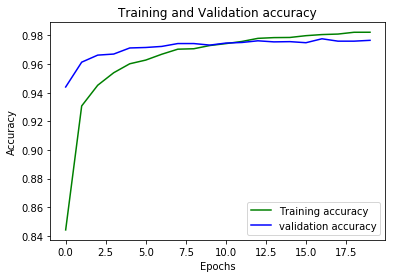

In [11]:
loss_train = Fit1.history['accuracy']
loss_val = Fit1.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

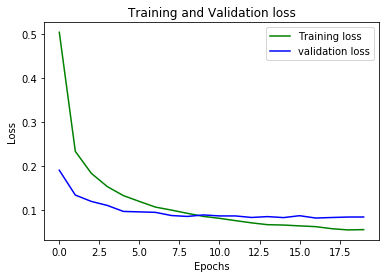

In [12]:
loss = Fit1.history['loss']
lossval = Fit1.history['val_loss']
plt.plot(loss, 'g', label='Training loss')
plt.plot(lossval, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the model.

In [13]:
test_loss, test_acc = model.evaluate(X_test, Y_test)


10000/10000 [==============================] - 1s 63us/sample - loss: 0.0784 - accuracy: 0.9779
Test Accuracy: 0.9779
Test Error: 0.07837951432883274


In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.save("model1")

In [39]:
tf.keras.models.load_model("model1")

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [20]:
from tensorflow.keras.datasets import boston_housing

In [22]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [23]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x_train_df = pd.DataFrame(x_train, columns = features)
x_test_df = pd.DataFrame(x_test, columns = features)
y_train_df = pd.DataFrame(y_train, columns = ['MEDV'])
y_test_df = pd.DataFrame(y_test, columns = ['MEDV'])

In [59]:
def build_model(): 
    
    model1 = Sequential()
    model1.add(Dense(12, input_dim=13, activation='relu'))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dense(1))
    model1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])
    return model1

In [60]:
model1 = build_model()

In [61]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model1.fit(x_train_df, y_train_df, epochs = 800, validation_split = 0.2,  verbose = 1, batch_size =10)

Train on 323 samples, validate on 81 samples
Epoch 1/800
323/323 [==============================] - 0s 193us/sample - loss: 10.7579 - mse: 10.7579 - mae: 2.3656 - val_loss: 16.9861 - val_mse: 16.9861 - val_mae: 3.2140
Epoch 2/800
323/323 [==============================] - 0s 214us/sample - loss: 11.6081 - mse: 11.6081 - mae: 2.5539 - val_loss: 14.8409 - val_mse: 14.8409 - val_mae: 3.0697
Epoch 3/800
323/323 [==============================] - 0s 165us/sample - loss: 11.7200 - mse: 11.7200 - mae: 2.4975 - val_loss: 22.3400 - val_mse: 22.3400 - val_mae: 3.6369
Epoch 4/800
323/323 [==============================] - 0s 193us/sample - loss: 12.1816 - mse: 12.1816 - mae: 2.6484 - val_loss: 13.1234 - val_mse: 13.1234 - val_mae: 2.8612
Epoch 5/800
323/323 [==============================] - 0s 316us/sample - loss: 10.7284 - mse: 10.7284 - mae: 2.3960 - val_loss: 15.0116 - val_mse: 15.0116 - val_mae: 2.9963
Epoch 6/800
323/323 [==============================] - 0s 322us/sample - loss: 10.4615 - m

Epoch 48/800
323/323 [==============================] - 0s 186us/sample - loss: 12.5369 - mse: 12.5369 - mae: 2.6102 - val_loss: 17.0300 - val_mse: 17.0300 - val_mae: 3.2905
Epoch 49/800
323/323 [==============================] - 0s 185us/sample - loss: 10.9736 - mse: 10.9736 - mae: 2.4518 - val_loss: 12.9577 - val_mse: 12.9577 - val_mae: 2.9026
Epoch 50/800
323/323 [==============================] - 0s 136us/sample - loss: 12.4315 - mse: 12.4315 - mae: 2.5939 - val_loss: 13.8555 - val_mse: 13.8555 - val_mae: 2.8842
Epoch 51/800
323/323 [==============================] - 0s 181us/sample - loss: 12.1291 - mse: 12.1291 - mae: 2.7026 - val_loss: 17.3643 - val_mse: 17.3643 - val_mae: 3.2640
Epoch 52/800
323/323 [==============================] - 0s 145us/sample - loss: 11.2119 - mse: 11.2119 - mae: 2.3577 - val_loss: 14.7675 - val_mse: 14.7675 - val_mae: 3.0169
Epoch 53/800
323/323 [==============================] - 0s 165us/sample - loss: 9.3398 - mse: 9.3398 - mae: 2.2051 - val_loss: 13.

323/323 [==============================] - 0s 384us/sample - loss: 10.4012 - mse: 10.4012 - mae: 2.3318 - val_loss: 25.8533 - val_mse: 25.8533 - val_mae: 4.1506
Epoch 142/800
323/323 [==============================] - 0s 337us/sample - loss: 13.6627 - mse: 13.6627 - mae: 2.7784 - val_loss: 13.0653 - val_mse: 13.0653 - val_mae: 2.8431
Epoch 143/800
323/323 [==============================] - 0s 140us/sample - loss: 10.5855 - mse: 10.5855 - mae: 2.3062 - val_loss: 14.8178 - val_mse: 14.8178 - val_mae: 3.0133
Epoch 144/800
323/323 [==============================] - 0s 162us/sample - loss: 9.6702 - mse: 9.6702 - mae: 2.3169 - val_loss: 24.5450 - val_mse: 24.5450 - val_mae: 3.9398
Epoch 145/800
323/323 [==============================] - 0s 152us/sample - loss: 12.3593 - mse: 12.3593 - mae: 2.5572 - val_loss: 12.6146 - val_mse: 12.6146 - val_mae: 2.8982
Epoch 146/800
323/323 [==============================] - 0s 159us/sample - loss: 10.4491 - mse: 10.4491 - mae: 2.3201 - val_loss: 16.5166 - v

323/323 [==============================] - 0s 260us/sample - loss: 9.3160 - mse: 9.3160 - mae: 2.1676 - val_loss: 15.1347 - val_mse: 15.1347 - val_mae: 3.1148
Epoch 189/800
323/323 [==============================] - 0s 260us/sample - loss: 9.6599 - mse: 9.6599 - mae: 2.3167 - val_loss: 12.6032 - val_mse: 12.6032 - val_mae: 2.8650
Epoch 190/800
323/323 [==============================] - 0s 228us/sample - loss: 10.2201 - mse: 10.2201 - mae: 2.3736 - val_loss: 17.1155 - val_mse: 17.1155 - val_mae: 3.2815
Epoch 191/800
323/323 [==============================] - 0s 191us/sample - loss: 10.9314 - mse: 10.9314 - mae: 2.3532 - val_loss: 13.0732 - val_mse: 13.0732 - val_mae: 2.8825
Epoch 192/800
323/323 [==============================] - 0s 261us/sample - loss: 14.4125 - mse: 14.4125 - mae: 2.7903 - val_loss: 15.0855 - val_mse: 15.0855 - val_mae: 3.2253
Epoch 193/800
323/323 [==============================] - 0s 260us/sample - loss: 10.9250 - mse: 10.9250 - mae: 2.3976 - val_loss: 12.7426 - val

323/323 [==============================] - 0s 198us/sample - loss: 9.5607 - mse: 9.5607 - mae: 2.2663 - val_loss: 13.2904 - val_mse: 13.2904 - val_mae: 2.8899
Epoch 236/800
323/323 [==============================] - 0s 186us/sample - loss: 8.8988 - mse: 8.8988 - mae: 2.1298 - val_loss: 12.4055 - val_mse: 12.4055 - val_mae: 2.8339
Epoch 237/800
323/323 [==============================] - 0s 137us/sample - loss: 10.3206 - mse: 10.3206 - mae: 2.3407 - val_loss: 14.3683 - val_mse: 14.3683 - val_mae: 2.9429
Epoch 238/800
323/323 [==============================] - 0s 175us/sample - loss: 10.1000 - mse: 10.1000 - mae: 2.2754 - val_loss: 14.0233 - val_mse: 14.0233 - val_mae: 2.9162
Epoch 239/800
323/323 [==============================] - 0s 168us/sample - loss: 9.6707 - mse: 9.6707 - mae: 2.1897 - val_loss: 12.5628 - val_mse: 12.5628 - val_mae: 2.7906
Epoch 240/800
323/323 [==============================] - 0s 165us/sample - loss: 12.1451 - mse: 12.1451 - mae: 2.6022 - val_loss: 13.2853 - val_m

Epoch 282/800
323/323 [==============================] - 0s 340us/sample - loss: 9.5776 - mse: 9.5776 - mae: 2.2627 - val_loss: 13.8002 - val_mse: 13.8002 - val_mae: 2.9246
Epoch 283/800
323/323 [==============================] - 0s 229us/sample - loss: 9.5421 - mse: 9.5421 - mae: 2.1723 - val_loss: 13.2199 - val_mse: 13.2199 - val_mae: 2.9810
Epoch 284/800
323/323 [==============================] - 0s 127us/sample - loss: 10.9936 - mse: 10.9936 - mae: 2.4251 - val_loss: 15.0483 - val_mse: 15.0483 - val_mae: 2.9986
Epoch 285/800
323/323 [==============================] - 0s 142us/sample - loss: 11.9694 - mse: 11.9694 - mae: 2.6001 - val_loss: 21.0132 - val_mse: 21.0132 - val_mae: 3.7113
Epoch 286/800
323/323 [==============================] - 0s 149us/sample - loss: 11.6628 - mse: 11.6628 - mae: 2.5442 - val_loss: 12.8263 - val_mse: 12.8263 - val_mae: 2.8515
Epoch 287/800
323/323 [==============================] - 0s 176us/sample - loss: 9.5554 - mse: 9.5554 - mae: 2.2512 - val_loss: 1

323/323 [==============================] - 0s 235us/sample - loss: 9.6558 - mse: 9.6558 - mae: 2.2054 - val_loss: 12.8496 - val_mse: 12.8496 - val_mae: 2.9032
Epoch 377/800
323/323 [==============================] - 0s 182us/sample - loss: 8.3617 - mse: 8.3617 - mae: 2.0995 - val_loss: 15.5058 - val_mse: 15.5058 - val_mae: 3.0643
Epoch 378/800
323/323 [==============================] - 0s 150us/sample - loss: 10.2181 - mse: 10.2181 - mae: 2.3013 - val_loss: 13.2494 - val_mse: 13.2494 - val_mae: 2.9246
Epoch 379/800
323/323 [==============================] - 0s 153us/sample - loss: 9.8384 - mse: 9.8384 - mae: 2.2540 - val_loss: 13.6305 - val_mse: 13.6305 - val_mae: 2.8349
Epoch 380/800
323/323 [==============================] - 0s 184us/sample - loss: 10.1854 - mse: 10.1854 - mae: 2.4005 - val_loss: 14.3497 - val_mse: 14.3497 - val_mae: 3.0278
Epoch 381/800
323/323 [==============================] - 0s 133us/sample - loss: 9.7026 - mse: 9.7026 - mae: 2.3124 - val_loss: 14.0495 - val_mse

323/323 [==============================] - 0s 248us/sample - loss: 10.8183 - mse: 10.8183 - mae: 2.4608 - val_loss: 15.7984 - val_mse: 15.7984 - val_mae: 3.0905
Epoch 471/800
323/323 [==============================] - 0s 198us/sample - loss: 10.9164 - mse: 10.9164 - mae: 2.4660 - val_loss: 14.2831 - val_mse: 14.2831 - val_mae: 2.9269
Epoch 472/800
323/323 [==============================] - 0s 333us/sample - loss: 8.1547 - mse: 8.1547 - mae: 2.0195 - val_loss: 12.5282 - val_mse: 12.5282 - val_mae: 2.8112
Epoch 473/800
323/323 [==============================] - 0s 266us/sample - loss: 8.6776 - mse: 8.6776 - mae: 2.1625 - val_loss: 12.3278 - val_mse: 12.3278 - val_mae: 2.7418
Epoch 474/800
323/323 [==============================] - 0s 187us/sample - loss: 7.8361 - mse: 7.8361 - mae: 2.0687 - val_loss: 20.0829 - val_mse: 20.0829 - val_mae: 3.5799
Epoch 475/800
323/323 [==============================] - 0s 180us/sample - loss: 9.9084 - mse: 9.9084 - mae: 2.3121 - val_loss: 14.3113 - val_mse

323/323 [==============================] - 0s 173us/sample - loss: 8.9308 - mse: 8.9308 - mae: 2.2079 - val_loss: 13.5048 - val_mse: 13.5048 - val_mae: 2.8700
Epoch 565/800
323/323 [==============================] - 0s 186us/sample - loss: 8.1583 - mse: 8.1583 - mae: 2.0481 - val_loss: 17.9677 - val_mse: 17.9677 - val_mae: 3.3233
Epoch 566/800
323/323 [==============================] - 0s 224us/sample - loss: 7.9965 - mse: 7.9965 - mae: 2.1018 - val_loss: 12.9980 - val_mse: 12.9980 - val_mae: 2.7596
Epoch 567/800
323/323 [==============================] - 0s 186us/sample - loss: 9.0637 - mse: 9.0637 - mae: 2.2148 - val_loss: 12.1815 - val_mse: 12.1815 - val_mae: 2.7777
Epoch 568/800
323/323 [==============================] - 0s 123us/sample - loss: 8.3585 - mse: 8.3585 - mae: 2.1264 - val_loss: 11.9308 - val_mse: 11.9308 - val_mae: 2.7749
Epoch 569/800
323/323 [==============================] - 0s 183us/sample - loss: 9.0168 - mse: 9.0168 - mae: 2.2015 - val_loss: 14.1813 - val_mse: 14

323/323 [==============================] - 0s 223us/sample - loss: 9.5013 - mse: 9.5013 - mae: 2.2668 - val_loss: 15.3947 - val_mse: 15.3947 - val_mae: 3.0398
Epoch 659/800
323/323 [==============================] - 0s 164us/sample - loss: 8.2586 - mse: 8.2586 - mae: 2.0845 - val_loss: 13.6008 - val_mse: 13.6008 - val_mae: 2.8854
Epoch 660/800
323/323 [==============================] - 0s 170us/sample - loss: 8.9373 - mse: 8.9373 - mae: 2.2646 - val_loss: 12.7883 - val_mse: 12.7883 - val_mae: 2.6658
Epoch 661/800
323/323 [==============================] - 0s 171us/sample - loss: 10.3474 - mse: 10.3474 - mae: 2.3561 - val_loss: 13.4374 - val_mse: 13.4374 - val_mae: 2.8040
Epoch 662/800
323/323 [==============================] - 0s 161us/sample - loss: 8.9693 - mse: 8.9693 - mae: 2.2802 - val_loss: 13.5825 - val_mse: 13.5825 - val_mae: 2.8382
Epoch 663/800
323/323 [==============================] - 0s 153us/sample - loss: 8.3978 - mse: 8.3978 - mae: 2.1060 - val_loss: 14.0098 - val_mse: 

323/323 [==============================] - 0s 248us/sample - loss: 7.1511 - mse: 7.1511 - mae: 1.9410 - val_loss: 11.5886 - val_mse: 11.5886 - val_mae: 2.6800
Epoch 753/800
323/323 [==============================] - 0s 186us/sample - loss: 9.2352 - mse: 9.2352 - mae: 2.3235 - val_loss: 12.1783 - val_mse: 12.1783 - val_mae: 2.8240
Epoch 754/800
323/323 [==============================] - 0s 142us/sample - loss: 8.3637 - mse: 8.3637 - mae: 2.2259 - val_loss: 15.9705 - val_mse: 15.9705 - val_mae: 3.1166
Epoch 755/800
323/323 [==============================] - 0s 144us/sample - loss: 8.0055 - mse: 8.0055 - mae: 2.0897 - val_loss: 12.4415 - val_mse: 12.4415 - val_mae: 2.7239
Epoch 756/800
323/323 [==============================] - 0s 123us/sample - loss: 7.7706 - mse: 7.7706 - mae: 2.1345 - val_loss: 13.1564 - val_mse: 13.1564 - val_mae: 2.7762
Epoch 757/800
323/323 [==============================] - 0s 147us/sample - loss: 7.9092 - mse: 7.9092 - mae: 2.0309 - val_loss: 11.2588 - val_mse: 11

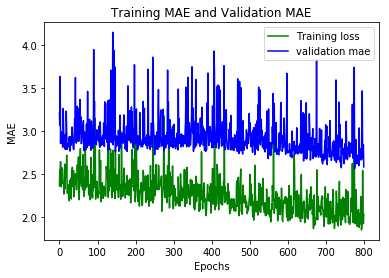

In [67]:
loss = history.history['mae']
lossval = history.history['val_mae']
plt.plot(loss, 'g', label='Training loss')
plt.plot(lossval, 'b', label='validation mae')
plt.title('Training MAE and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [74]:
loss, mse, mae=  model1.evaluate(x_test_df, y_test_df)
print('Test Mean Abs Erro: ',mae )
print('Test Error:', loss)

102/102 [==============================] - 0s 0s/sample - loss: 27.7994 - mse: 27.7994 - mae: 3.4015
Test Mean Abs Erro:  3.4015493
Test Error: 27.79943339029948
